# 📝 ĐỒ ÁN CUỐI KỲ MÔN: TƯƠNG TÁC DỮ LIỆU TRỰC QUAN( DATA VISUALIZATION)

## 📍Đề tài: Phân tích và dự đoán tình trạng nghỉ việc của nhân viên tại IBM

## 👨‍👩‍👧‍👦 Thành viên nhóm:

| STT | Họ và tên | Vai trò     | Phụ trách chính                          |
| --- | --------- | ----------- | ---------------------------------------- |
| 1   | Don       | Thành viên  | Giai đoạn 1, 2, Demo pipeline            |
| 2   | Hùng      | Thành viên  | Giai đoạn 3, 5 (model)                   |
| 3   | Hải       | Nhóm trưởng | Giai đoạn 4, 6 (storytelling), Trình bày |


## 📁 Dataset sử dụng:
Tên: WA_Fn-UseC_-HR-Employee-Attrition.csv 

Nguồn: Kaggle

Link: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

## $Nội dung báo cáo: 

### 🎯 Giai đoạn 1: Hiểu & Thống kê sơ bộ

Mục tiêu: 
- Đọc mô tả trường dữ liệu, xác định kiểu & ý nghĩa
- Khảo sát % thiếu giá trị, giá trị ngoại lệ (box-plot, z-score, IQR)
- Thống kê mô tả (mean, median, std…) cho biến số & phân bố cho biến hạng


#### 1.1 Đọc dữ liệu & hiểu ý nghĩa cột

Import thư viện cần thiết

In [1]:
# Thư viện cơ bản
import pandas as pd
import numpy as np

# Vẽ biểu đồ thô ban đầu
import matplotlib.pyplot as plt
import seaborn as sns

# Thư viện kiểm tra thống kê
from scipy import stats

In [2]:
# Đọc dữ liệu
df = pd.read_csv('Data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Xem tổng quan
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


| **Cột**                    | **Giải thích** |
|----------------------------|----------------|
| Age                        | Tuổi của nhân viên |
| Attrition                  | Tình trạng nghỉ việc (Yes: nghỉ việc, No: không nghỉ việc) |
| BusinessTravel             | Tần suất công tác (Travel_Rarely: hiếm khi, Travel_Frequently: thường xuyên, Non-Travel: không công tác) |
| DailyRate                  | Mức lương hàng ngày |
| Department                 | Phòng ban nơi nhân viên làm việc (Sales, Research & Development, ...) |
| DistanceFromHome           | Khoảng cách từ nhà đến nơi làm việc (tính bằng dặm) |
| Education                  | Mức độ giáo dục của nhân viên (1: Below College, 2: College, 3: Bachelor, 4: Master, 5: Doctor) |
| EducationField             | Lĩnh vực học tập của nhân viên (Life Sciences, Medical, Other, ...) |
| EmployeeCount              | Số lượng nhân viên trong công ty (luôn là 1) |
| EmployeeNumber             | Số hiệu nhân viên (mỗi nhân viên có một số duy nhất) |
| EnvironmentSatisfaction    | Mức độ hài lòng với môi trường làm việc (1: Low, 2: Medium, 3: High, 4: Very High) |
| Gender                     | Giới tính của nhân viên (Male: Nam, Female: Nữ) |
| HourlyRate                 | Mức lương theo giờ |
| JobInvolvement             | Mức độ tham gia công việc (1: Low, 2: Medium, 3: High, 4: Very High) |
| JobLevel                   | Cấp độ công việc (1: Entry Level, 2: Junior, 3: Mid, 4: Senior, 5: Lead) |
| JobRole                    | Vai trò công việc của nhân viên (Sales Executive, Research Scientist, ...) |
| JobSatisfaction            | Mức độ hài lòng với công việc (1: Low, 2: Medium, 3: High, 4: Very High) |
| MaritalStatus              | Tình trạng hôn nhân (Single: Độc thân, Married: Đã kết hôn, Divorced: Đã ly hôn) |
| MonthlyIncome              | Thu nhập hàng tháng |
| MonthlyRate                | Mức lương hàng tháng |
| NumCompaniesWorked         | Số công ty mà nhân viên đã làm việc trong quá khứ |
| Over18                     | Trạng thái trên 18 tuổi (luôn là "Y") |
| OverTime                   | Có làm thêm giờ hay không (Yes: có, No: không) |
| PercentSalaryHike          | Tỷ lệ tăng lương theo phần trăm |
| PerformanceRating          | Đánh giá hiệu suất công việc (1: Low, 2: Good, 3: Excellent) |
| RelationshipSatisfaction   | Mức độ hài lòng với các mối quan hệ công việc (1: Low, 2: Medium, 3: High, 4: Very High) |
| StandardHours              | Số giờ làm việc chuẩn (luôn là 80) |
| StockOptionLevel           | Mức độ quyền chọn cổ phiếu (0: Không có, 1: Thấp, 2: Cao) |
| TotalWorkingYears          | Tổng số năm làm việc của nhân viên từ khi bắt đầu đi làm |
| TrainingTimesLastYear      | Số lần tham gia huấn luyện trong năm ngoái |
| WorkLifeBalance            | Cân bằng giữa công việc và cuộc sống (1: Low, 2: Medium, 3: High) |
| YearsAtCompany             | Số năm làm việc tại công ty hiện tại |
| YearsInCurrentRole         | Số năm làm việc ở vị trí hiện tại |
| YearsSinceLastPromotion    | Số năm kể từ lần thăng chức gần nhất |
| YearsWithCurrManager       | Số năm làm việc với người quản lý hiện tại |


#### 1.2 Kiểm tra dữ liệu thiếu & giá trị ngoại lệ 

In [3]:
# Kiểm tra số lượng giá trị thiếu
missing_values = df.isnull().sum()

# In ra các cột có giá trị thiếu
print("Dữ liệu thiếu:")
print(missing_values[missing_values > 0])


Dữ liệu thiếu:
Series([], dtype: int64)


In [4]:
# Kiểm tra tổng số dòng trùng lặp
duplicate_count = df.duplicated().sum()

print(f"Số dòng bị trùng lặp: {duplicate_count}")


Số dòng bị trùng lặp: 0


Phân loại biến để kiểm tra giá trị ngoại lệ  

In [5]:
# Target variable
target_col = 'Attrition'

# Numerical variables
numerical_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
    'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
    'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
    'YearsWithCurrManager'
]

# Categorical variables
categorical_cols = [
    'BusinessTravel', 'Department', 'EducationField', 
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]

# Ordinal variables
ordinal_cols = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
    'JobLevel', 'JobSatisfaction', 'PerformanceRating', 
    'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'
]

# Columns to drop
drop_cols = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']


In [6]:
# Thống kê mô tả nhóm biến số
df[numerical_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0
TrainingTimesLastYear,1470.0,2.799320,1.289271,0.0,2.0,3.0,3.00,6.0


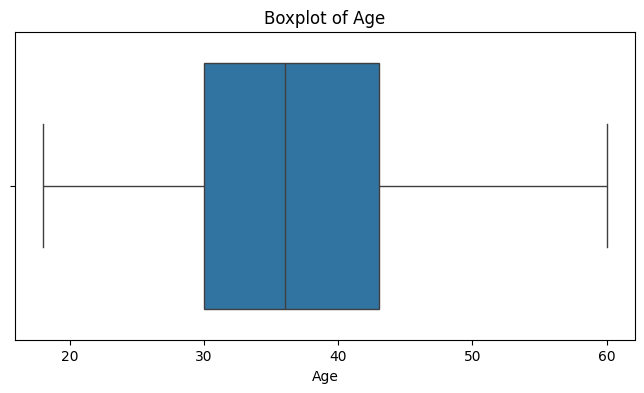

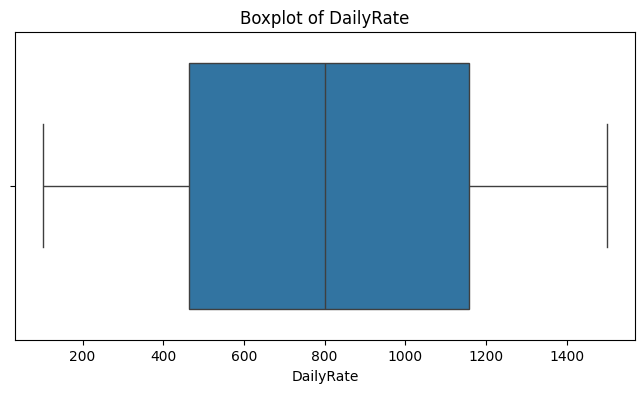

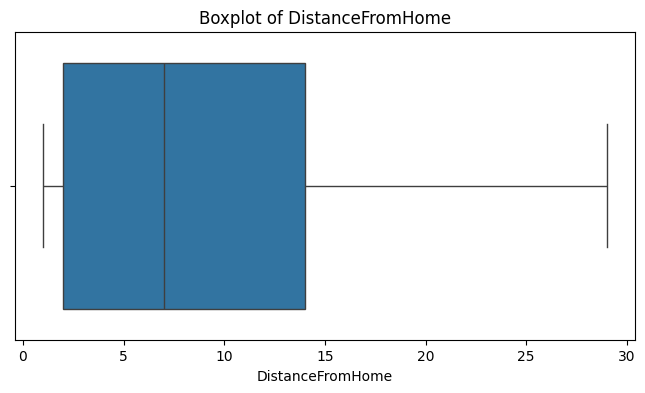

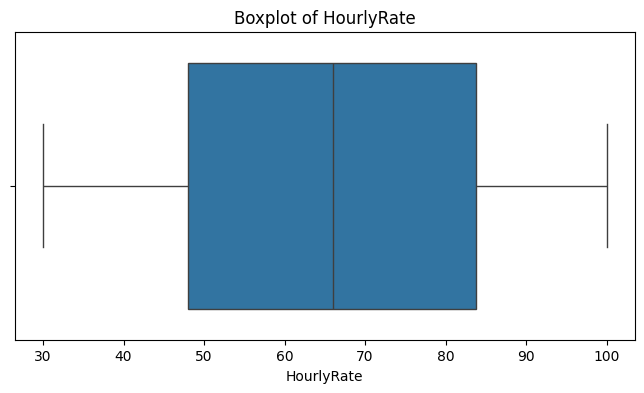

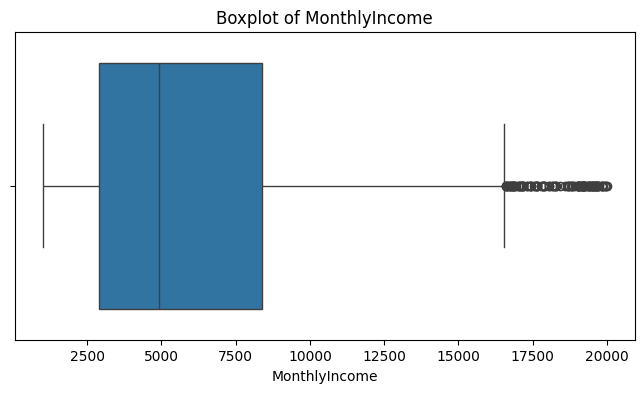

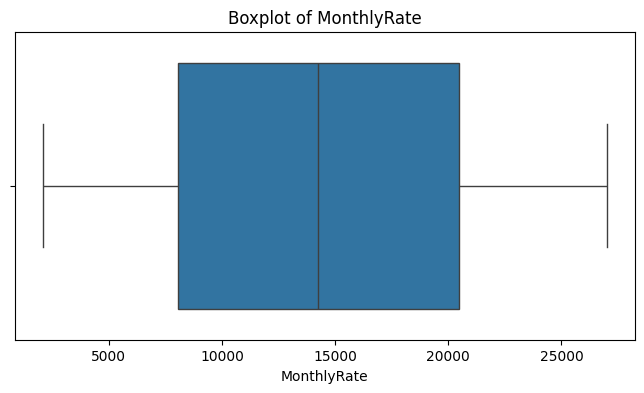

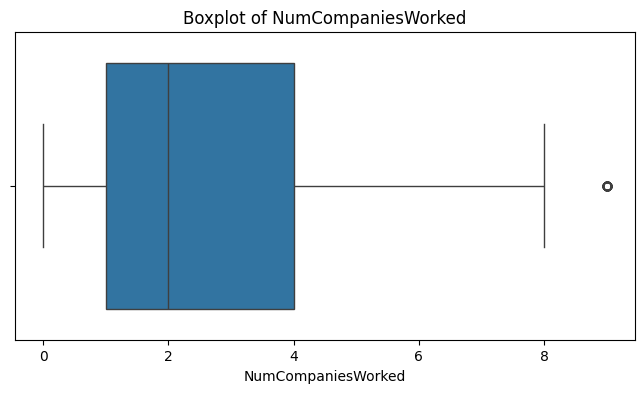

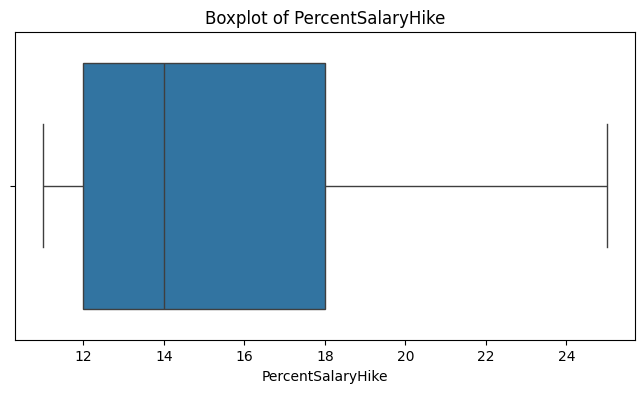

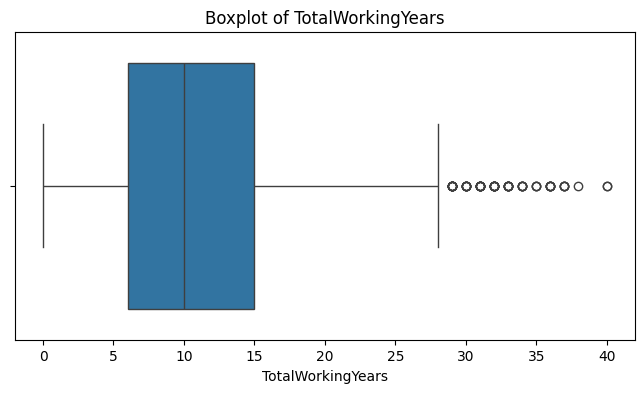

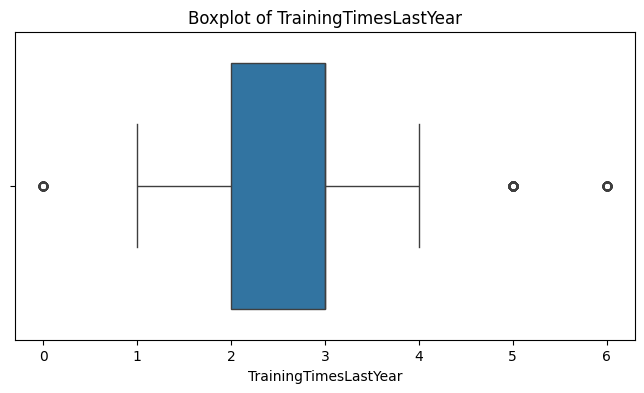

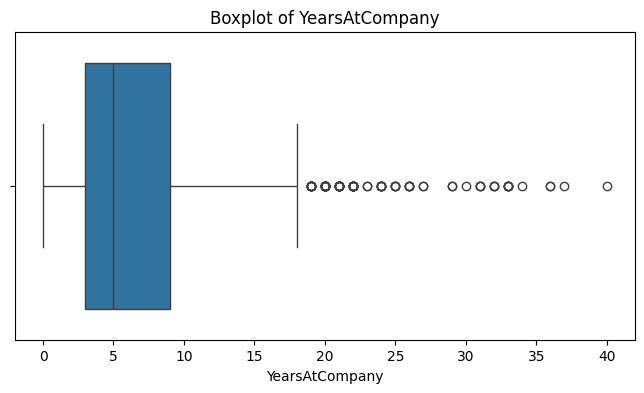

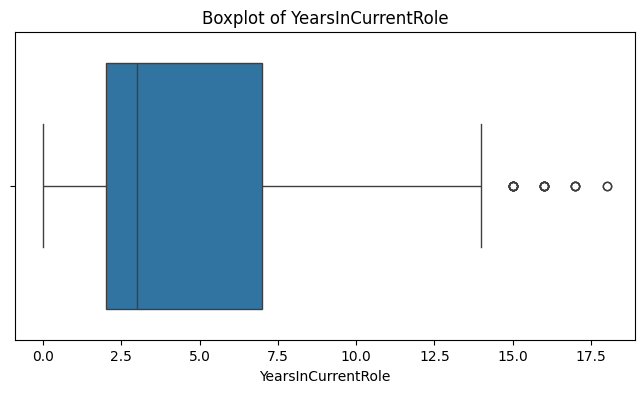

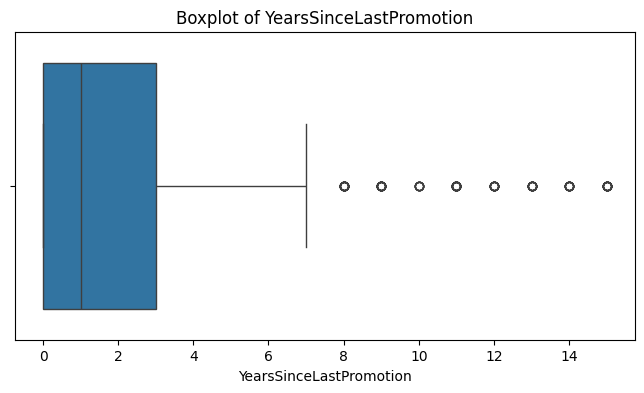

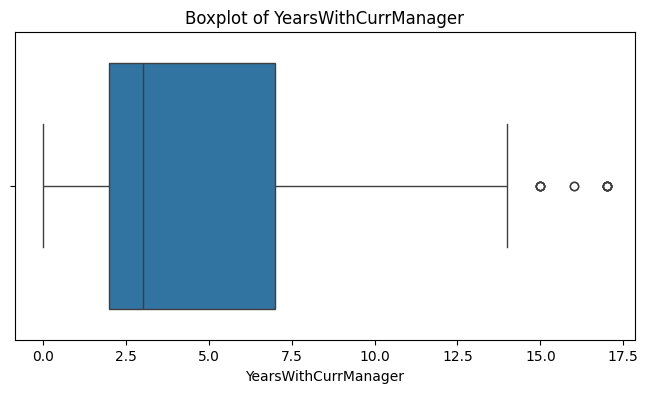

In [7]:
# Vẽ Boxplot từng biến số
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


**Nhận xét: Nhìn sơ qua thì số liệu khá ổn định, không có dữ liệu bất thường nào.**

### 🧼 Giai đoạn 2: Làm sạch & Chuẩn hoá

Mục tiêu: 
- Xử lý NA (bỏ, suy diễn, median impute)
- Chuẩn hóa tên cột, kiểu dữ liệu (datetime, category)
- Gộp/nhóm age, income thành band
- Sinh biến mới: TenureBand, IncomeBand, WorkLifeBalanceScore (mức 1-4)


#### 2.1 Xử lý dữ liệu thiếu

In [8]:
# Bỏ để đỡ gây nhiễu:
df.drop(columns=['MonthlyRate'], inplace=True)


- Trong quá trình khám phá dữ liệu (EDA), chúng tôi nhận thấy biến MonthlyRate có phân bố giá trị rất rộng, dao động từ 2.094 đến 26.999 USD.
Tuy nhiên, khi so sánh với các biến kinh tế khác như MonthlyIncome – vốn trực tiếp thể hiện thu nhập thực tế của nhân viên, thì MonthlyRate không có mối quan hệ rõ ràng với việc nghỉ việc (Attrition).

#### 2.2 Chuẩn hóa tên cột & kiểu dữ liệu

In [9]:
# Chuẩn hóa datatype
for col in categorical_cols + [target_col]:
    df[col] = df[col].astype('category')

print("✅ Đã chuẩn hóa datatype cho các biến phân loại.")

✅ Đã chuẩn hóa datatype cho các biến phân loại.


#### 2.3 Nhóm và sinh biến mới

In [10]:
#Phân nhóm
# Nhóm tuổi
df['AgeBand'] = pd.cut(
    df['Age'], 
    bins=[17, 25, 30, 35, 40, 60], 
    labels=['18-25', '26-30', '31-35', '36-40', '41+']
)

df['AgeBand'] = df['AgeBand'].astype('category')

print("✅ Đã sinh biến AgeBand.")

# Nhóm thâm niên làm việc
df['TenureBand'] = pd.cut(
    df['YearsAtCompany'],
    bins=[-1, 1, 3, 5, 10, 40],
    labels=['<1y', '1-3y', '3-5y', '5-10y', '>10y']
)

df['TenureBand'] = df['TenureBand'].astype('category')

print("✅ Đã sinh biến TenureBand.")


# Nhóm mức thu nhập
df['IncomeBand'] = pd.cut(
    df['MonthlyIncome'],
    bins=[0, 3000, 5000, 8000, 12000, 20000],
    labels=['Low', 'Lower-Mid', 'Mid', 'Upper-Mid', 'High']
)

df['IncomeBand'] = df['IncomeBand'].astype('category')

print("✅ Đã sinh biến IncomeBand.")



✅ Đã sinh biến AgeBand.
✅ Đã sinh biến TenureBand.
✅ Đã sinh biến IncomeBand.


#### 2.4 Lưu dữ liệu đã xử lý ra file CSV

In [11]:
df.to_csv('Data/ibm_hr_clean.csv', index=False)


3.1 Phân bố tổng thể attrition

Countplot attrition (pie chart hoặc barplot)

3.2 Phân bố theo các nhóm

Attrition vs. Department

Attrition vs. JobRole

Attrition vs. AgeBand, TenureBand

Attrition vs. OverTime, JobSatisfaction, EnvSatisfaction
→ Từng cái dùng countplot + annotate %

3.3 Phân tích tương quan

Heatmap tương quan biến số

Xem mối quan hệ giữa income, satisfaction, years,...

3.4 Sankey Diagram

Biểu đồ dòng: đi làm → overtime → nghỉ việc

### 📌 Giai đoạn 4: KPI Cốt lõi

Mục tiêu: Tính toán các KPI liên quan đến nghỉ việc và chi phí ảnh hưởng.

### KPI 1: Tỷ lệ nghỉ việc (Attrition Rate) theo Phòng ban và Chức danh công việc (Department/JobRole)


- Sau khi nhận diện được tỷ lệ nghỉ việc chung toàn công ty, câu hỏi tiếp theo chúng tôi đặt ra là: "Vậy thì, nhân viên ở đâu đang nghỉ việc nhiều nhất?"

Không phải tất cả các phòng ban hay chức danh đều chịu ảnh hưởng như nhau. Một số bộ phận có thể đang ổn định, trong khi những bộ phận khác lại âm thầm mất đi một lượng lớn nhân viên.

Việc phân tích tỷ lệ nghỉ việc theo từng Department (phòng ban) và Job Role (chức danh công việc) cho phép chúng ta:

Khoanh vùng “ổ dịch” – những nơi có nguy cơ cao nhất.

Ưu tiên nguồn lực – tập trung hành động ở những nơi cần thiết nhất.

Hiểu sâu bản chất – xem liệu công việc, môi trường, hay yêu cầu công việc có đang ảnh hưởng đến quyết định rời đi của nhân viên hay không.

Vì vậy, trong phần tiếp theo, chúng tôi sẽ phân tích Attrition Rate theo từng Department và Job Role nhằm xác định những điểm nóng về nghỉ việc trong tổ chức.

#### 🔍Khám phá thông tin sơ bộ về phòng ban và role

In [12]:

# Tổng số nhân viên theo Department
dept_total = df['Department'].value_counts()

# Tổng số nhân viên theo JobRole
jobrole_total = df['JobRole'].value_counts()

# In ra kết quả
print("Tổng số nhân viên theo Department:")
print(dept_total)

print("\nTổng số nhân viên theo JobRole:")
print(jobrole_total)


Tổng số nhân viên theo Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Tổng số nhân viên theo JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


#### 🔍Phân tích Attrition dựa phòng ban và role

In [13]:
# 🔹 Tính attrition rate toàn công ty
attrition_total = (df['Attrition'] == 'Yes').mean() * 100
print(f"✅ Attrition Rate toàn công ty: {attrition_total:.2f}%\n")

# 🔹 Tạo bảng Department
dept_summary = pd.DataFrame({
    'Số nghỉ việc': df[df['Attrition'] == 'Yes']['Department'].value_counts(),
    'Tổng nhân viên': df['Department'].value_counts()
})
dept_summary['Attrition Rate (%)'] = (dept_summary['Số nghỉ việc'] / dept_summary['Tổng nhân viên']) * 100
dept_summary['Chênh lệch với trung bình (%)'] = dept_summary['Attrition Rate (%)'] - attrition_total
dept_summary = dept_summary.sort_values(by='Attrition Rate (%)', ascending=False)

print("📊 Thống kê nghỉ việc theo Department:")
print(dept_summary)

# 🔹 Tạo bảng JobRole
jobrole_summary = pd.DataFrame({
    'Số nghỉ việc': df[df['Attrition'] == 'Yes']['JobRole'].value_counts(),
    'Tổng nhân viên': df['JobRole'].value_counts()
})
jobrole_summary['Attrition Rate (%)'] = (jobrole_summary['Số nghỉ việc'] / jobrole_summary['Tổng nhân viên']) * 100
jobrole_summary['Chênh lệch với trung bình (%)'] = jobrole_summary['Attrition Rate (%)'] - attrition_total
jobrole_summary = jobrole_summary.sort_values(by='Attrition Rate (%)', ascending=False)

print("\n📊 Thống kê nghỉ việc theo JobRole:")
print(jobrole_summary)


✅ Attrition Rate toàn công ty: 16.12%

📊 Thống kê nghỉ việc theo Department:
                        Số nghỉ việc  Tổng nhân viên  Attrition Rate (%)  \
Department                                                                 
Sales                             92             446           20.627803   
Human Resources                   12              63           19.047619   
Research & Development           133             961           13.839750   

                        Chênh lệch với trung bình (%)  
Department                                             
Sales                                        4.505354  
Human Resources                              2.925170  
Research & Development                      -2.282699  

📊 Thống kê nghỉ việc theo JobRole:
                           Số nghỉ việc  Tổng nhân viên  Attrition Rate (%)  \
JobRole                                                                       
Sales Representative                 33              83           39

C:\Users\maiho\AppData\Local\Temp\ipykernel_6768\3308545605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


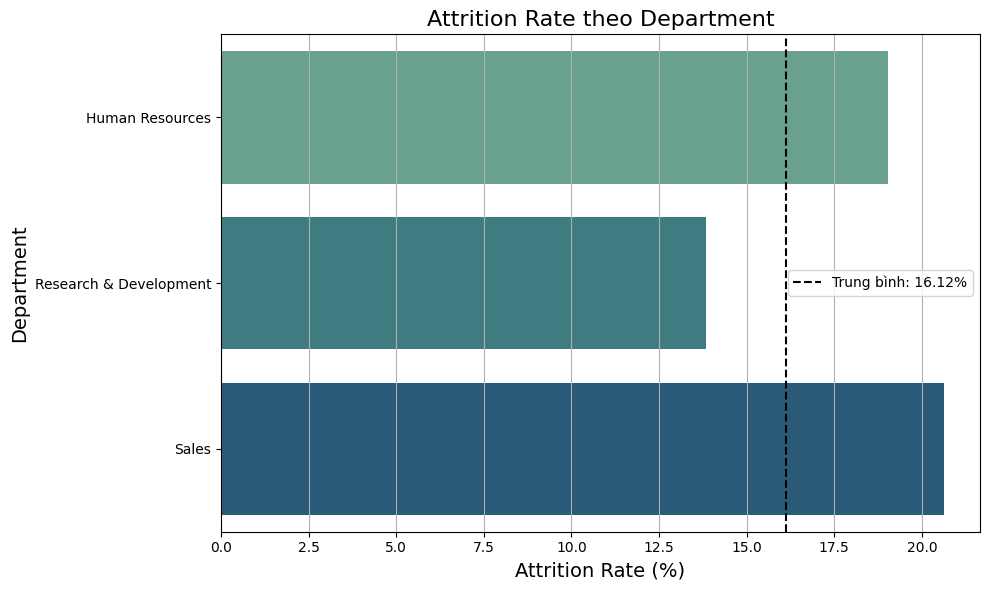

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Attrition Rate (%)',
    y=dept_summary.index,
    data=dept_summary,
    palette='crest'
)
plt.axvline(attrition_total, color='black', linestyle='--', label=f'Trung bình: {attrition_total:.2f}%')
plt.title('Attrition Rate theo Department', fontsize=16)
plt.xlabel('Attrition Rate (%)', fontsize=14)
plt.ylabel('Department', fontsize=14)
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


C:\Users\maiho\AppData\Local\Temp\ipykernel_6768\538222816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


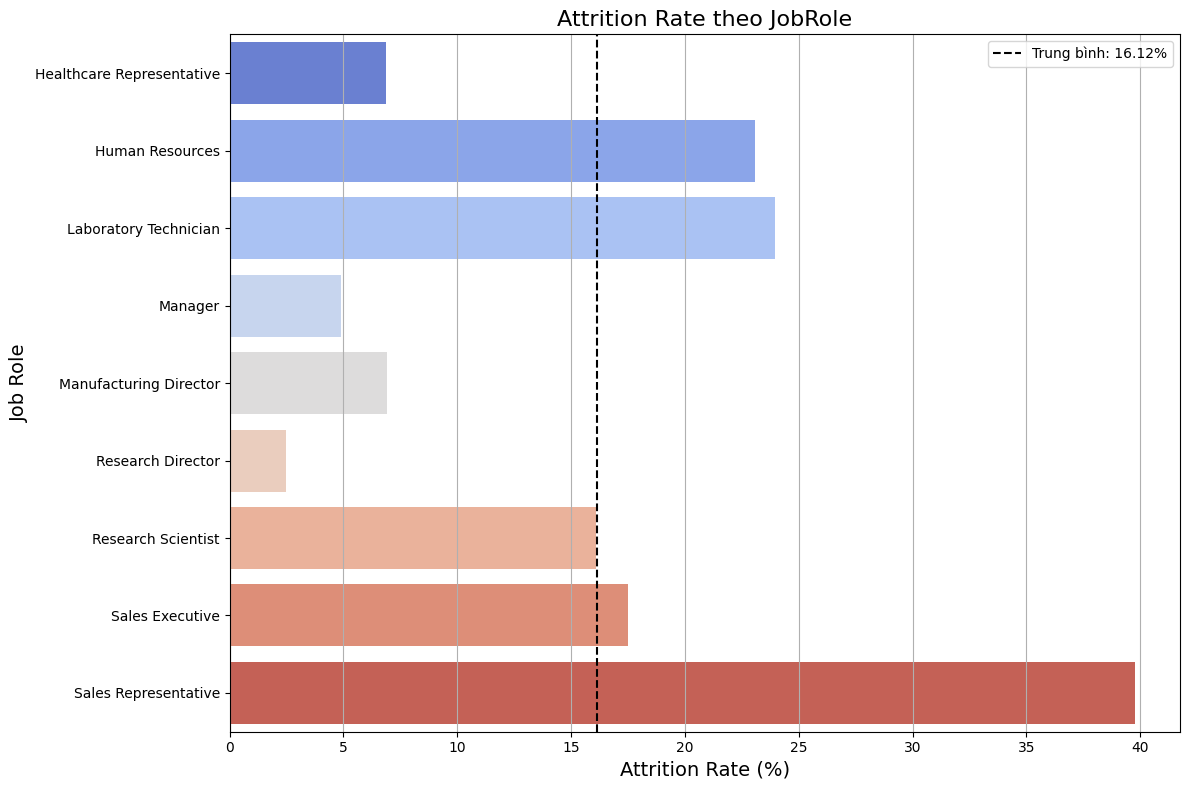

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Attrition Rate (%)',
    y=jobrole_summary.index,
    data=jobrole_summary,
    palette='coolwarm'
)
plt.axvline(attrition_total, color='black', linestyle='--', label=f'Trung bình: {attrition_total:.2f}%')
plt.title('Attrition Rate theo JobRole', fontsize=16)
plt.xlabel('Attrition Rate (%)', fontsize=14)
plt.ylabel('Job Role', fontsize=14)
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


#### 🎯 KPI: Attrition Rate theo Department và Job Role



##### ✅ Bức tranh toàn cảnh: Tỷ lệ nghỉ việc toàn công ty

> Tỷ lệ nghỉ việc trung bình của toàn công ty hiện tại là **16.12%**.  
> Ở mức này, có vẻ như mọi thứ vẫn nằm trong ngưỡng chấp nhận được.

🟢 *Tâm lý ban đầu của người đọc: "Ổn mà, không đến mức phải lo."*



##### 🚨 Những tín hiệu vượt chuẩn bắt đầu xuất hiện…

📊 **Attrition Rate theo Department**:

| Department            | Số nghỉ việc | Tổng nhân viên | Attrition Rate (%) | So với trung bình |
|----------------------|--------------|----------------|---------------------|--------------------|
| Sales                | 92           | 446            | **20.63%**          | **+4.51%**         |
| Human Resources      | 12           | 63             | 19.05%              | +2.93%             |
| Research & Development | 133        | 961            | 13.84%              | –2.28%             |

> Bộ phận **Sales** – động cơ chính của doanh thu – đang có tỷ lệ nghỉ việc cao hơn trung bình đến **4.5%**, tương đương mức tăng **28% so với chuẩn**.

🟡 *Khán giả bắt đầu cảm nhận có điều gì đó không ổn đang âm thầm xảy ra.*



##### 🔥 Cao trào: Khoanh vùng “ổ dịch” bên trong bộ phận Sales

📊 **Attrition Rate theo Job Role**:

| Job Role              | Số nghỉ việc | Tổng nhân viên | Attrition Rate (%) | So với trung bình |
|-----------------------|--------------|----------------|---------------------|--------------------|
| Sales Representative  | 33           | 83             | **39.76%**          | **+23.64%**        |
| Laboratory Technician | 62           | 259            | 23.94%              | +7.82%             |
| Sales Executive       | 57           | 326            | 17.48%              | +1.36%             |

> **Gần 40%** nhân viên **Sales Representative** rời bỏ công ty.  
> Điều này nghĩa là **cứ 5 người được tuyển thì 2 người sẽ rời đi** trong thời gian ngắn.

> Đây không còn là một con số “báo động” – nó là một **ổ dịch nhân sự thực sự**.

🔴 *Người đọc bị kéo vào vùng nguy hiểm. Đây là điểm cao trào của câu chuyện.*



##### 💸 Tác động thực tế: “Con số nhỏ, thiệt hại lớn”

> Với chi phí tuyển dụng – đào tạo trung bình ước tính **10.000 USD/người**,  
> Công ty đang thiệt hại tới **330.000 USD/năm** chỉ riêng ở nhóm Sales Representative.

💥 *Cảm xúc chuyển sang tài chính – đau ví tiền – thôi thúc hành động ngay.*



##### 🧠 Kết luận & Dẫn dắt

> 👉 **Sales Representative là "ổ dịch trọng tâm" cần ưu tiên phân tích nguyên nhân.**  
> 👉 Các yếu tố cần làm rõ tiếp theo: **OverTime**, **Job Satisfaction**, **Thu nhập**.

🧭 *Câu chuyện đã đi đến cao trào và mở ra chương mới – tìm nguyên nhân và giải pháp.*




### KPI 3: Tỷ lệ nghỉ việc (%) giữa nhóm Có và Không Overtime

#### ❓ Câu hỏi kinh doanh

"Làm thêm giờ (OverTime) có phải là một yếu tố góp phần khiến nhân viên nghỉ việc tại công ty?"

Câu hỏi này hướng đến việc kiểm tra xem việc yêu cầu nhân viên làm thêm giờ có liên quan đến xu hướng rời bỏ công ty hay không. Nếu có, công ty cần điều chỉnh khối lượng công việc, đặc biệt với nhóm làm thêm thường xuyên.

#### 🎯 Mục tiêu

Phân tích ảnh hưởng của yếu tố OverTime (làm thêm giờ) đến tình trạng Attrition (nghỉ việc), nhằm phát hiện các rủi ro tiềm ẩn và xây dựng chính sách nhân sự giảm nghỉ việc hiệu quả hơn.

#### 💡 Lý do lựa chọn KPI

- Nhân viên làm thêm giờ thường gặp tình trạng áp lực công việc cao hoặc bị ép buộc làm việc quá mức.

- Đây là một yếu tố quan sát được rõ ràng và có thể can thiệp trực tiếp thông qua chính sách.

- Việc theo dõi và phân tích mối quan hệ giữa OverTime và Attrition giúp xác định nhóm có nguy cơ nghỉ việc cao.Đánh giá mức độ tác động của Overtime tới Attrition
Đề xuất các biện pháp giảm tải, tái phân phối nhân lực, hoặc hỗ trợ nhóm làm thêm nhiều

#### 📚 Cách phân tích
1. Tính tỷ lệ nghỉ việc trong từng nhóm OverTime: "Yes" (có làm thêm) vs "No" (không làm thêm).

2. Tính tỷ lệ làm thêm giờ trong mỗi nhóm Attrition: "Yes" (đã nghỉ việc) vs "No" (vẫn đang làm).

3. Trực quan hóa dữ liệu bằng biểu đồ cột.

4. Đưa ra nhận xét riêng cho từng biểu đồ để rút ra insight.

#### 1. 🕵️‍♂️ Khám phá sơ bộ dữ liệu liên quan đến KPI 3: OverTime & Attrition

🧭 Thống kê nhanh

In [16]:
# Thống kê nhanh
print("\n📌 Một vài dòng dữ liệu mẫu:")
display(df[['OverTime', 'Attrition']].sample(5))


📌 Một vài dòng dữ liệu mẫu:


,OverTime,Attrition
761,No,Yes
765,No,No
721,Yes,No
562,Yes,Yes
1205,No,Yes


✅ Kiểu dữ liệu và các giá trị duy nhất

In [17]:
# Kiểm tra kiểu dữ liệu
print("\n📌 Kiểu dữ liệu:")
print(df[['OverTime', 'Attrition']].dtypes)

# Kiểm tra giá trị duy nhất của OverTime và Attrition
print("\n📌 Các giá trị duy nhất:")
print("OverTime:", df['OverTime'].unique())
print("Attrition:", df['Attrition'].unique())



📌 Kiểu dữ liệu:
OverTime     category
Attrition    category
dtype: object

📌 Các giá trị duy nhất:
OverTime: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Attrition: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']


**Nhận xét: Dữ liệu phù hợp để phân tích so sánh và kiểm định thống kê.**

📊 Phân bố làm thêm giờ

In [18]:
# Phân bố OverTime trong toàn bộ tập dữ liệu
print("\n📌 Phân bố OverTime:")
print(df['OverTime'].value_counts(normalize=True) * 100)


📌 Phân bố OverTime:
OverTime
No     71.70068
Yes    28.29932
Name: proportion, dtype: float64


**Nhận xét: Chỉ khoảng 1/4 nhân viên có làm thêm giờ, là nhóm cần quan tâm đặc biệt.**

📉 Tỷ lệ nghỉ việc toàn bộ nhân viên

In [19]:
# Phân bố Attrition tổng thể
print("\n📌 Tỷ lệ nghỉ việc toàn bộ nhân viên:")
print(df['Attrition'].value_counts(normalize=True) * 100)


📌 Tỷ lệ nghỉ việc toàn bộ nhân viên:
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


**Nhận xét: Tỷ lệ nghỉ việc tổng thể không quá cao, nhưng có thể không đồng đều giữa các nhóm.**

🔍 Phân bố OverTime theo tình trạng nghỉ việc

In [20]:
# Phân bố OverTime trong từng nhóm Attrition
print("\n📌 Phân bố OverTime theo tình trạng nghỉ việc:")
print(pd.crosstab(df['Attrition'], df['OverTime'], normalize='index') * 100)


📌 Phân bố OverTime theo tình trạng nghỉ việc:
OverTime          No        Yes
Attrition                      
No         76.561233  23.438767
Yes        46.413502  53.586498


**Nhận xét:**

- Trong nhóm nghỉ việc: hơn 53% có làm thêm.

- Trong nhóm ở lại: chỉ 23% làm thêm.

👉 Kết luận sơ bộ: Làm thêm giờ có thể là một yếu tố rủi ro dẫn đến nghỉ việc.

    Biểu đồ cột: Phân bố OverTime theo tình trạng nghỉ việc

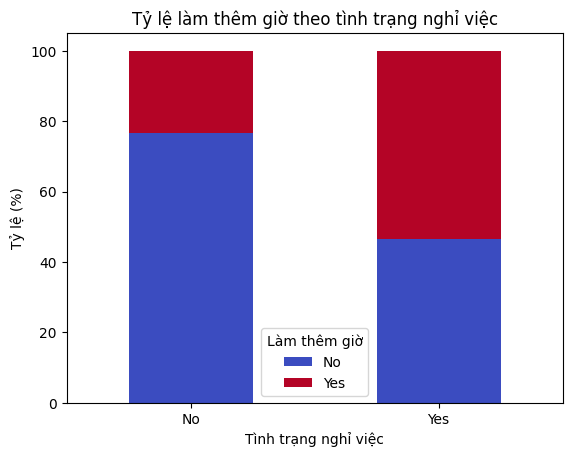

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo bảng dữ liệu
ct = pd.crosstab(df['Attrition'], df['OverTime'], normalize='index') * 100
ct.plot(kind='bar', stacked=True, colormap='coolwarm')

plt.title('Tỷ lệ làm thêm giờ theo tình trạng nghỉ việc')
plt.ylabel('Tỷ lệ (%)')
plt.xlabel('Tình trạng nghỉ việc')
plt.legend(title='Làm thêm giờ')
plt.xticks(rotation=0)
plt.show()


**Nhận xét:**

Biểu đồ cho thấy nhóm nghỉ việc có phần lớn nhân viên làm thêm.

Ngược lại, nhóm ở lại chủ yếu không làm thêm.

#### 2. 🧮  Phân tích sâu hơn mối liên hệ giữa OverTime và nghỉ việc

##### Tỷ lệ nghỉ việc theo OverTime:

In [22]:
# Tổng số nhân viên theo OverTime
ot_total = df['OverTime'].value_counts()

# Số nhân viên nghỉ việc theo OverTime
ot_left = df[df['Attrition'] == 'Yes']['OverTime'].value_counts()

# Tính tỷ lệ nghỉ việc (%)
ot_attrition_rate = (ot_left / ot_total) * 100
ot_attrition_rate = ot_attrition_rate.sort_values(ascending=False)

# In kết quả
print("📌 Tổng số nhân viên theo OverTime:")
print(df['OverTime'].value_counts())

print("\n📌 Số người nghỉ việc theo OverTime:")
print(df[df['Attrition'] == 'Yes']['OverTime'].value_counts())


print("\n📌Tỷ lệ nghỉ việc theo OverTime (%):")
print(ot_attrition_rate)


📌 Tổng số nhân viên theo OverTime:
OverTime
No     1054
Yes     416
Name: count, dtype: int64

📌 Số người nghỉ việc theo OverTime:
OverTime
Yes    127
No     110
Name: count, dtype: int64

📌Tỷ lệ nghỉ việc theo OverTime (%):
OverTime
Yes    30.528846
No     10.436433
Name: count, dtype: float64


##### Tỷ lệ làm thêm giờ theo Attrition:

In [23]:
# Chia dữ liệu thành hai nhóm theo Attrition
nhan_vien_nghi = df[df['Attrition'] == 'Yes']
nhan_vien_o_lai = df[df['Attrition'] == 'No']

# Đếm số lượng nhân viên mỗi nhóm
so_nv_nghi = len(nhan_vien_nghi)
so_nv_o_lai = len(nhan_vien_o_lai)

# Đếm số lượng và tỷ lệ làm thêm giờ trong mỗi nhóm
so_lam_them_nghi = nhan_vien_nghi['OverTime'].value_counts().get('Yes', 0)
so_lam_them_o_lai = nhan_vien_o_lai['OverTime'].value_counts().get('Yes', 0)

ty_le_overtime_nghi = (so_lam_them_nghi / so_nv_nghi) * 100
ty_le_overtime_o_lai = (so_lam_them_o_lai / so_nv_o_lai) * 100

# In thông tin chi tiết
print("📊 Thống kê làm thêm giờ theo tình trạng nghỉ việc:\n")

print(f"Tổng số nhân viên đã nghỉ việc: {so_nv_nghi}")
print(f"  - Số người làm thêm giờ: {so_lam_them_nghi}")
print(f"  - Tỷ lệ làm thêm giờ: {ty_le_overtime_nghi:.2f}%\n")

print(f"Tổng số nhân viên còn lại: {so_nv_o_lai}")
print(f"  - Số người làm thêm giờ: {so_lam_them_o_lai}")
print(f"  - Tỷ lệ làm thêm giờ: {ty_le_overtime_o_lai:.2f}%")

📊 Thống kê làm thêm giờ theo tình trạng nghỉ việc:

Tổng số nhân viên đã nghỉ việc: 237
  - Số người làm thêm giờ: 127
  - Tỷ lệ làm thêm giờ: 53.59%

Tổng số nhân viên còn lại: 1233
  - Số người làm thêm giờ: 289
  - Tỷ lệ làm thêm giờ: 23.44%


##### Kết quả phân tích kết hợp

In [24]:

# Kết hợp kết quả để phân tích sâu hơn
analysis_results = pd.DataFrame({
    'Attrition_Rate': ot_attrition_rate,
    'Overtime_Percentage': [ty_le_overtime_o_lai, ty_le_overtime_nghi]
}, index=['No', 'Yes'])

print("\nKết quả phân tích kết hợp:")
print(analysis_results)


Kết quả phân tích kết hợp:
     Attrition_Rate  Overtime_Percentage
No        10.436433            23.438767
Yes       30.528846            53.586498


#### 3. 📈  Trực quan hóa mối liên hệ giữa OverTime và nghỉ việc

    Biểu đồ 1: Tỷ lệ nghỉ việc theo OverTime

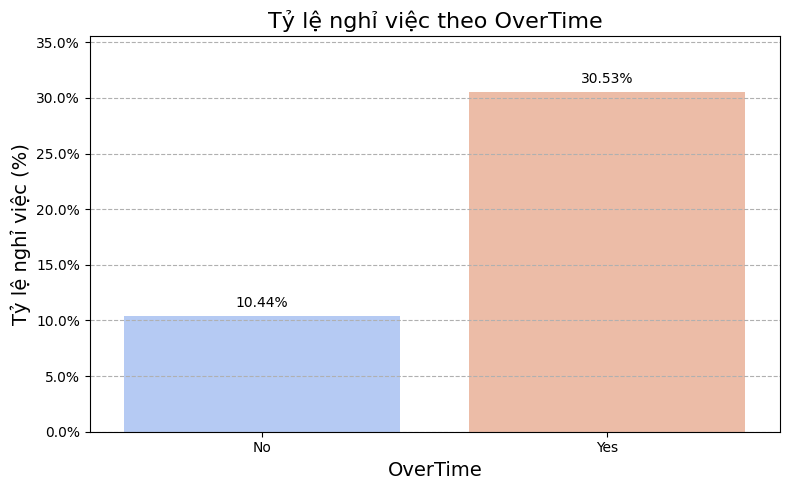

In [25]:

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=ot_attrition_rate.index, y=ot_attrition_rate.values, hue=ot_attrition_rate.index,
                 palette='coolwarm', legend=False)

plt.title('Tỷ lệ nghỉ việc theo OverTime', fontsize=16)
plt.xlabel('OverTime', fontsize=14)
plt.ylabel('Tỷ lệ nghỉ việc (%)', fontsize=14)
plt.ylim(0, ot_attrition_rate.max() + 5)
plt.grid(axis='y', linestyle='--') # Thêm đường lưới đứt nét cho dễ nhìn

# Thêm nhãn giá trị trên cột
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
            f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

# Định dạng trục y thành phần trăm
import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout() # Điều chỉnh layout để tránh nhãn bị cắt
plt.show()

**Mô tả:**

Biểu đồ này thể hiện tỷ lệ nghỉ việc (%) theo hai nhóm nhân viên: nhóm không làm thêm giờ ("No") và nhóm có làm thêm giờ ("Yes"). Trục hoành biểu thị trạng thái làm thêm giờ, trục tung biểu thị tỷ lệ nghỉ việc.

**Phân tích:**

- Sự khác biệt rõ rệt: Có một sự khác biệt đáng kể về tỷ lệ nghỉ việc giữa hai nhóm.
- Nhóm làm thêm giờ có tỷ lệ nghỉ việc cao hơn: Tỷ lệ nghỉ việc của nhóm "Yes" (30.53%) cao gần gấp ba lần so với nhóm "No" (10.44%).
- Làm thêm giờ là yếu tố nguy cơ: Điều này cho thấy rằng việc làm thêm giờ có thể là một yếu tố nguy cơ quan trọng, làm tăng khả năng nhân viên rời bỏ công ty.

**Nhận xét:**

Biểu đồ này cung cấp bằng chứng trực quan mạnh mẽ về mối liên hệ giữa làm thêm giờ và tỷ lệ nghỉ việc. Tuy nhiên, nó chỉ cho thấy mối tương quan, không phải là quan hệ nhân quả. Cần có thêm phân tích để hiểu rõ hơn về các yếu tố nào khác có thể ảnh hưởng đến quyết định nghỉ việc của nhân viên làm thêm giờ.

    Biểu đồ 2: Tỷ lệ làm thêm giờ của nhóm nghỉ việc và ở lại

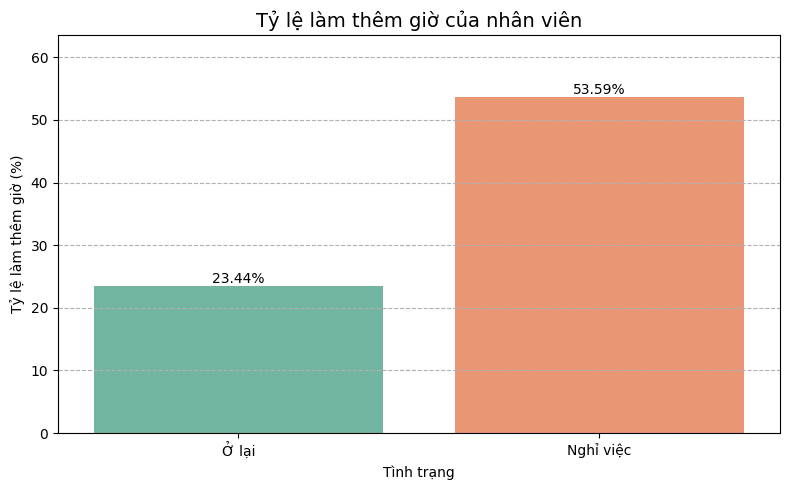

In [26]:

# Dữ liệu biểu đồ
df_plot = pd.DataFrame({
    'Tình trạng': ['Ở lại', 'Nghỉ việc'],
    'Tỷ lệ làm thêm': [ty_le_overtime_o_lai, ty_le_overtime_nghi]
})

plt.figure(figsize=(8, 5 ))
ax = sns.barplot(
    data=df_plot,
    x='Tình trạng',
    y='Tỷ lệ làm thêm',
    hue='Tình trạng',         # sửa lỗi cảnh báo
    palette='Set2',
    legend=False
)
plt.title('Tỷ lệ làm thêm giờ của nhân viên', fontsize=14)
plt.ylabel('Tỷ lệ làm thêm giờ (%)')
plt.grid(axis='y', linestyle='--')

# Nhãn trên cột
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
            f'{height:.2f}%', ha='center', fontsize=10)

plt.ylim(0, max(ty_le_overtime_nghi, ty_le_overtime_o_lai) + 10)
plt.tight_layout()
plt.show()


**Mô tả:**

Biểu đồ này so sánh tỷ lệ nhân viên làm thêm giờ (%) giữa nhóm nhân viên ở lại ("Ở lại") và nhóm nhân viên đã nghỉ việc ("Nghỉ việc"). Trục hoành biểu thị tình trạng nhân viên (ở lại hoặc nghỉ việc), trục tung biểu thị tỷ lệ làm thêm giờ.

**Phân tích:**

- Tỷ lệ làm thêm giờ khác nhau: Có sự khác biệt về tỷ lệ làm thêm giờ giữa hai nhóm nhân viên.
- Nhóm nghỉ việc làm thêm giờ nhiều hơn: Tỷ lệ làm thêm giờ ở nhóm "Nghỉ việc" (53.59%) cao hơn đáng kể so với nhóm "Ở lại" (23.44%).
- Làm thêm giờ và xu hướng nghỉ việc: Điều này cho thấy rằng nhân viên có xu hướng làm thêm giờ nhiều hơn cũng có xu hướng nghỉ việc cao hơn.

**Nhận xét:**

Biểu đồ này cung cấp một góc nhìn khác về mối quan hệ giữa làm thêm giờ và nghỉ việc, tập trung vào tỷ lệ làm thêm giờ trong từng nhóm nhân viên. Nó củng cố thêm cho phát hiện từ Biểu đồ 1, cho thấy rằng làm thêm giờ có thể là một yếu tố góp phần vào quyết định nghỉ việc.

#### 📋 Bảng So Sánh Tổng Hợp: Ảnh hưởng của OverTime đến nghỉ việc

| Nhóm OverTime | Tổng số NV | Số nghỉ việc | Tỷ lệ nghỉ việc (%) | Số làm thêm giờ                | Tỷ lệ làm thêm trong nhóm (%) |
| ------------- | ---------- | ------------ | ------------------- | ------------------------------ | ----------------------------- |
| **Yes**       | 416        | 127          | **30.53%**          | 127 (nghỉ) + 289 (ở lại) = 416 | - (toàn bộ nhóm làm thêm)     |
| **No**        | 1054       | 110          | **10.44%**          | 0 (không làm thêm)             | -                             |
| **Tổng cộng** | 1470       | 237          | 16.12%              | 416                            | 28.30%                        |

Ngoài ra:

| **Tình trạng**   | Tỷ lệ làm thêm giờ (%) |
| ---------------- | ---------------------- |
| **Đã nghỉ việc** | **53.59%**             |
| **Còn ở lại**    | **23.44%**             |


**Phân tích tổng quát**

Tỷ lệ nghỉ việc trong nhóm làm thêm giờ (OverTime = Yes) là 30.53%, cao gần gấp 3 lần so với nhóm không làm thêm (10.44%).

👉 Điều này cho thấy OverTime có tương quan mạnh với việc nghỉ việc.

Ngược lại, nếu xét theo nhóm "Đã nghỉ việc", thì hơn 53% trong số đó từng làm thêm giờ, so với chỉ 23% ở nhóm "Còn làm".

👉 Nghĩa là làm thêm giờ là một đặc điểm nổi bật của những người đã nghỉ việc.

**Kết luận từ phân tích**

✅ Câu trả lời cho câu hỏi ban đầu: "Làm thêm giờ có phải là yếu tố góp phần khiến nhân viên nghỉ việc?" là:

→ Có, và mức độ ảnh hưởng là RÕ RỆT và THUYẾT PHỤC.

**Nguyên nhân sâu xa cực kỳ thuyết phục**

👉 OverTime không chỉ là biểu hiện của khối lượng công việc cao, mà còn là tín hiệu cảnh báo môi trường làm việc đang mất cân bằng, cụ thể:

"Làm thêm giờ kéo dài dẫn đến kiệt sức, thiếu thời gian cá nhân, giảm gắn kết, và khiến nhân viên cảm thấy bị bóc lột hoặc không được đánh giá đúng – từ đó hình thành mong muốn rời bỏ."

Đây là một vòng xoáy burnout (kiệt sức) thường gặp trong các tổ chức không kiểm soát tốt khối lượng công việc và thời gian làm thêm.

#### 💡 Insight tổng quát
- OverTime là một chỉ số dự báo mạnh cho việc nghỉ việc.

- Việc giám sát số giờ OT và nhóm nhân viên làm thêm có thể giúp phát hiện rủi ro nghỉ việc từ sớm.

- Đây là yếu tố dễ đo lường, dễ hành động và có tiềm năng cải thiện giữ chân nhân viên.

#### ✅ Đề xuất hành động
- Giới hạn giờ OT hàng tuần và công khai chính sách rõ ràng.

- Thưởng OT hợp lý hoặc cung cấp các quyền lợi bù đắp (ngày nghỉ, phúc lợi).

- Thiết lập hệ thống cảnh báo sớm nếu nhân viên làm thêm quá mức trong nhiều tuần liên tiếp.

- Khảo sát hài lòng định kỳ đối với nhân viên làm thêm để đánh giá nguy cơ burnout.